In [22]:
import numpy as np
import pandas as pd
# Set our RNG seed for reproducibility.
RANDOM_STATE_SEED = 1
np.random.seed(RANDOM_STATE_SEED)

In [8]:
!pip install modAL

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [24]:
dataset = pd.read_csv("glass.data", sep = ',', header = None)
X_raw = dataset.iloc[:, 1:dataset.shape[1]-1].to_numpy()
y_raw = dataset.iloc[:, -1].to_numpy()

In [25]:
from copy import deepcopy

X_pool = deepcopy(X_raw)
y_pool = deepcopy(y_raw)
n_initial = round(len(X_raw)*0.1)

In [42]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from modAL.models import ActiveLearner, Committee
from modAL.disagreement import vote_entropy_sampling
from modAL.disagreement import KL_max_disagreement
from modAL.disagreement import vote_entropy
from modAL.disagreement import max_disagreement_sampling

X_pool = deepcopy(X_raw)
y_pool = deepcopy(y_raw)
# initializing Committee members
n_members = 5
learner_list = list()

for member_idx in range(n_members):
    # initial training data
    n_initial = round(len(X_raw)*0.1)
    train_idx = np.random.choice(range(X_pool.shape[0]), size = n_initial, replace=False)
    X_train = X_pool[train_idx]
    y_train = y_pool[train_idx]

    # creating a reduced copy of the data with the known instances removed
    X_pool = np.delete(X_pool, train_idx, axis=0)
    y_pool = np.delete(y_pool, train_idx)

    # initializing learner
    learner = ActiveLearner(
        estimator=RandomForestClassifier(),
        X_training=X_train, y_training = y_train
    )
    learner_list.append(learner)

# assembling the committee
committee_KL = Committee(learner_list=learner_list,
                     query_strategy=KL_max_disagreement)

committee_entropy = Committee(learner_list=learner_list,
                     query_strategy=vote_entropy_sampling)

comittee_version_space_KL = Committee(learner_list=learner_list,
                     query_strategy=KL_max_disagreement)

In [ ]:
version_space_size_KL = []
version_space_points = vote_entropy(comittee_version_space_KL, X_raw)
version_space_points = version_space_points[version_space_points!=0]
print('Intial Size of version space is ' + str(version_space_points.shape))

performance_history_KL_10 = [committee_KL.score(X_raw, y_raw)]
X_pool = deepcopy(X_raw)
y_pool = deepcopy(y_raw)
# query by committee
for idx in range(len(X_raw)):
    query_idx,_ = max_disagreement_sampling(comittee_version_space_KL, X_pool)
#     query_instance = committee_KL.query(X_pool)
#     query_idx = query_instance.argmax()
    query_idx = np.array((query_idx))
    comittee_version_space_KL.teach(
        X = X_pool[query_idx].reshape(1, -1),
        y = y_pool[query_idx].reshape(1, )
    )
    performance_history_KL_10.append(comittee_version_space_KL.score(X_raw, y_raw))
    # remove queried instance from pool
    X_pool = np.delete(X_pool, query_idx, axis = 0)
    y_pool = np.delete(y_pool, query_idx)
    version_space_points = vote_entropy(comittee_version_space_KL, X_raw)
    version_space_points = version_space_points[version_space_points!=0]
    print('Size of version space at iteration ' + str(idx) + ':' + str(version_space_points.shape))
    version_space_size_KL.append(version_space_points.shape)
    

Intial Size of version space is (153,)
Size of version space at iteration 0:(149,)
Size of version space at iteration 1:(148,)
Size of version space at iteration 2:(140,)
Size of version space at iteration 3:(142,)
Size of version space at iteration 4:(132,)
Size of version space at iteration 5:(127,)
Size of version space at iteration 6:(128,)
Size of version space at iteration 7:(115,)
Size of version space at iteration 8:(122,)
Size of version space at iteration 9:(122,)
Size of version space at iteration 10:(123,)
Size of version space at iteration 11:(121,)
Size of version space at iteration 12:(114,)
Size of version space at iteration 13:(124,)
Size of version space at iteration 14:(129,)
Size of version space at iteration 15:(112,)
Size of version space at iteration 16:(122,)
Size of version space at iteration 17:(114,)
Size of version space at iteration 18:(112,)
Size of version space at iteration 19:(115,)
Size of version space at iteration 20:(110,)
Size of version space at i

Size of version space at iteration 185:(1,)
Size of version space at iteration 186:(1,)
Size of version space at iteration 187:(0,)
Size of version space at iteration 188:(1,)
Size of version space at iteration 189:(1,)
Size of version space at iteration 190:(1,)
Size of version space at iteration 191:(1,)


In [35]:
version_space_size_entropy = []
version_space_points = vote_entropy(committee_entropy, X_raw)
version_space_points = version_space_points[version_space_points!=0]
print('Intial Size of version space is ' + str(version_space_points.shape))

performance_history_KL_10 = [committee_KL.score(X_raw, y_raw)]
X_pool = deepcopy(X_raw)
y_pool = deepcopy(y_raw)
# query by committee
for idx in range(len(X_raw)):
    query_idx,_ = max_disagreement_sampling(comittee_version_space_KL, X_pool)
#     query_instance = committee_KL.query(X_pool)
#     query_idx = query_instance.argmax()
    query_idx = np.array((query_idx))
    comittee_version_space_KL.teach(
        X = X_pool[query_idx].reshape(1, -1),
        y = y_pool[query_idx].reshape(1, )
    )
    performance_history_KL_10.append(comittee_version_space_KL.score(X_raw, y_raw))
    # remove queried instance from pool
    X_pool = np.delete(X_pool, query_idx, axis = 0)
    y_pool = np.delete(y_pool, query_idx)
    version_space_points = vote_entropy(comittee_version_space_KL, X_raw)
    version_space_points = version_space_points[version_space_points!=0]
    print('Size of version space at iteration ' + str(idx) + ':' + str(version_space_points.shape))
    version_space_size_entropy.append(version_space_points.shape)
    

Intial Size of version space is (176,)
Size of version space at iteration 0:(154,)
Size of version space at iteration 1:(143,)
Size of version space at iteration 2:(150,)
Size of version space at iteration 3:(161,)
Size of version space at iteration 4:(156,)
Size of version space at iteration 5:(149,)
Size of version space at iteration 6:(145,)
Size of version space at iteration 7:(147,)
Size of version space at iteration 8:(136,)
Size of version space at iteration 9:(135,)
Size of version space at iteration 10:(143,)
Size of version space at iteration 11:(130,)
Size of version space at iteration 12:(130,)
Size of version space at iteration 13:(139,)
Size of version space at iteration 14:(136,)
Size of version space at iteration 15:(129,)
Size of version space at iteration 16:(144,)
Size of version space at iteration 17:(133,)
Size of version space at iteration 18:(133,)
Size of version space at iteration 19:(132,)
Size of version space at iteration 20:(125,)
Size of version space at i

Size of version space at iteration 185:(4,)
Size of version space at iteration 186:(1,)
Size of version space at iteration 187:(2,)
Size of version space at iteration 188:(1,)
Size of version space at iteration 189:(1,)
Size of version space at iteration 190:(3,)
Size of version space at iteration 191:(2,)
Size of version space at iteration 192:(1,)
Size of version space at iteration 193:(1,)
Size of version space at iteration 194:(2,)
Size of version space at iteration 195:(2,)
Size of version space at iteration 196:(1,)
Size of version space at iteration 197:(1,)
Size of version space at iteration 198:(1,)
Size of version space at iteration 199:(0,)
Size of version space at iteration 200:(0,)
Size of version space at iteration 201:(0,)
Size of version space at iteration 202:(0,)
Size of version space at iteration 203:(0,)
Size of version space at iteration 204:(0,)
Size of version space at iteration 205:(0,)
Size of version space at iteration 206:(0,)
Size of version space at iterati

In [36]:
version_space_size_KL = np.array(version_space_size_KL)
version_space_size_entropy = np.array(version_space_size_entropy)

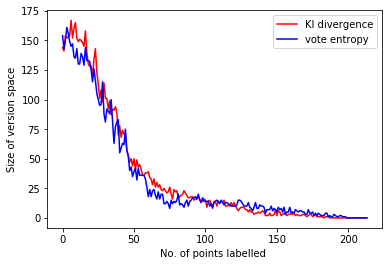

In [39]:
plt.plot(version_space_size_KL, color ='red', label = 'Kl divergence')
plt.plot(version_space_size_entropy, color ='blue', label ='vote entropy')
plt.legend(loc="upper right")
plt.xlabel('No. of points labelled ')
plt.ylabel('Size of version space')
plt.show()